<a href="https://colab.research.google.com/github/hungvo2003vn/Computer-Vision/blob/Ass1/Project_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kết nối với drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
print("Current working directory:", os.getcwd())

Current working directory: /content


In [3]:
# Set the new working directory
YOUR_PROJECT_LOCATION = '/content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 1'
os.chdir(YOUR_PROJECT_LOCATION)

# Verify the change
print("Current working directory:", os.getcwd())


Current working directory: /content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 1


In [16]:
# Chọn ảnh
image_path = os.getcwd() + '/Images/'

# Lấy toàn bộ tên ảnh ra
image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
image_array = [file for file in os.listdir(image_path) if any(file.endswith(ext) for ext in image_extensions)]

# Verify ảnh
print('Path của thư mục ảnh: ', image_path)
for pic_name in image_array:
  print('Ảnh đã chọn: ', pic_name)

Path của thư mục ảnh:  /content/drive/MyDrive/Colab Notebooks/Course Computer Vision/Assignment 1/Images/
Ảnh đã chọn:  Cat1.jpg
Ảnh đã chọn:  people1.jpg
Ảnh đã chọn:  car1.jpg
Ảnh đã chọn:  Dog1.jpeg


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [18]:
# Đọc ảnh màu
def plot_images(imgs, img_path, columns=4):

  rows = math.ceil(len(imgs) / columns)
  fig, axs = plt.subplots(rows, columns, figsize=(rows * 10, columns * 20))
  img_colors = []
  for i, img_source in enumerate(imgs):
    img_color = plt.imread(img_path + img_source)
    img_colors += [img_color]

    # Tính chỉ số hàng và cột cho ảnh hiện tại
    row = i // columns
    col = i % columns
    # Nếu chỉ có một hàng hoặc một cột, chỉ có một chiều trong axs
    if rows == 1:
      axs[col].imshow(img_color)
      axs[col].set_title(img_source)
      axs[col].axis('off')
    elif columns == 1:
      axs[row].imshow(img_color)
      axs[row].set_title(img_source)
      axs[row].axis('off')
    else:
      # Hiển thị ảnh trên subplot tại vị trí hàng, cột
      axs[row, col].imshow(img_color)
      axs[row, col].set_title(img_source)
      axs[row, col].axis('off')  # Tắt các trục

  # Hiển thị tất cả subplot
  plt.tight_layout()
  plt.show()

  return img_colors

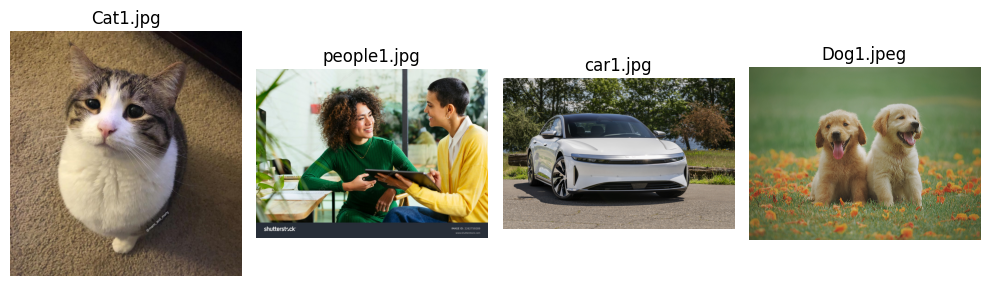

In [19]:
# Sử dụng hàm plot_images để vẽ ảnh
image_color_array = plot_images(image_array, image_path)

In [20]:
# Chuyển đổi sang ảnh xám
def rgb_to_gray(imgs):
    return np.dot(imgs[...,:3], [0.2989, 0.5870, 0.1140])

In [21]:
def gray_to_color(img_gray):
    # Tạo bảng màu cố định
    color_palette = [
        [0, 0, 0],     # Đen
        [255, 0, 0],   # Đỏ
        [0, 255, 0],   # Xanh lá cây
        [0, 0, 255],   # Xanh dương
        [255, 255, 255]  # Trắng
        # Thêm các màu khác tùy ý
    ]

    # Chia phạm vi giá trị của ảnh xám thành các khoảng tương ứng với số lượng màu trong bảng màu
    max_gray_value = np.max(img_gray)
    num_colors = len(color_palette)
    color_step = max_gray_value / (num_colors - 1)

    # Tạo ảnh màu từ ảnh xám
    height, width = img_gray.shape
    this_image_color = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            gray_value = img_gray[i, j]
            color_index = int(gray_value / color_step)
            this_image_color[i, j] = color_palette[color_index]

    return this_image_color


In [22]:
# Chuyển đổi từ ảnh màu sang ảnh xám
image_gray_array = [rgb_to_gray(img_color) for img_color in image_color_array]

# Chuyển đổi từ ảnh xám sang ảnh màu
image_color_from_gray_array = [gray_to_color(image_gray) for image_gray in image_gray_array]

In [23]:
# Hiển thị ảnh gốc, ảnh xám và ảnh màu từ ảnh xám
def plot_multiple_images(original_images, grayscale_images, color_from_gray_images):
    num_images = len(original_images)
    num_cols = 3
    num_rows = num_images

    plt.figure(figsize=(15, 5*num_rows))

    for i in range(num_images):
        plt.subplot(num_rows, num_cols, i*num_cols + 1)
        plt.imshow(original_images[i])
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(num_rows, num_cols, i*num_cols + 2)
        plt.imshow(grayscale_images[i], cmap='gray')
        plt.title('Grayscale Image')
        plt.axis('off')

        plt.subplot(num_rows, num_cols, i*num_cols + 3)
        plt.imshow(color_from_gray_images[i])
        plt.title('Color Image from Grayscale')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

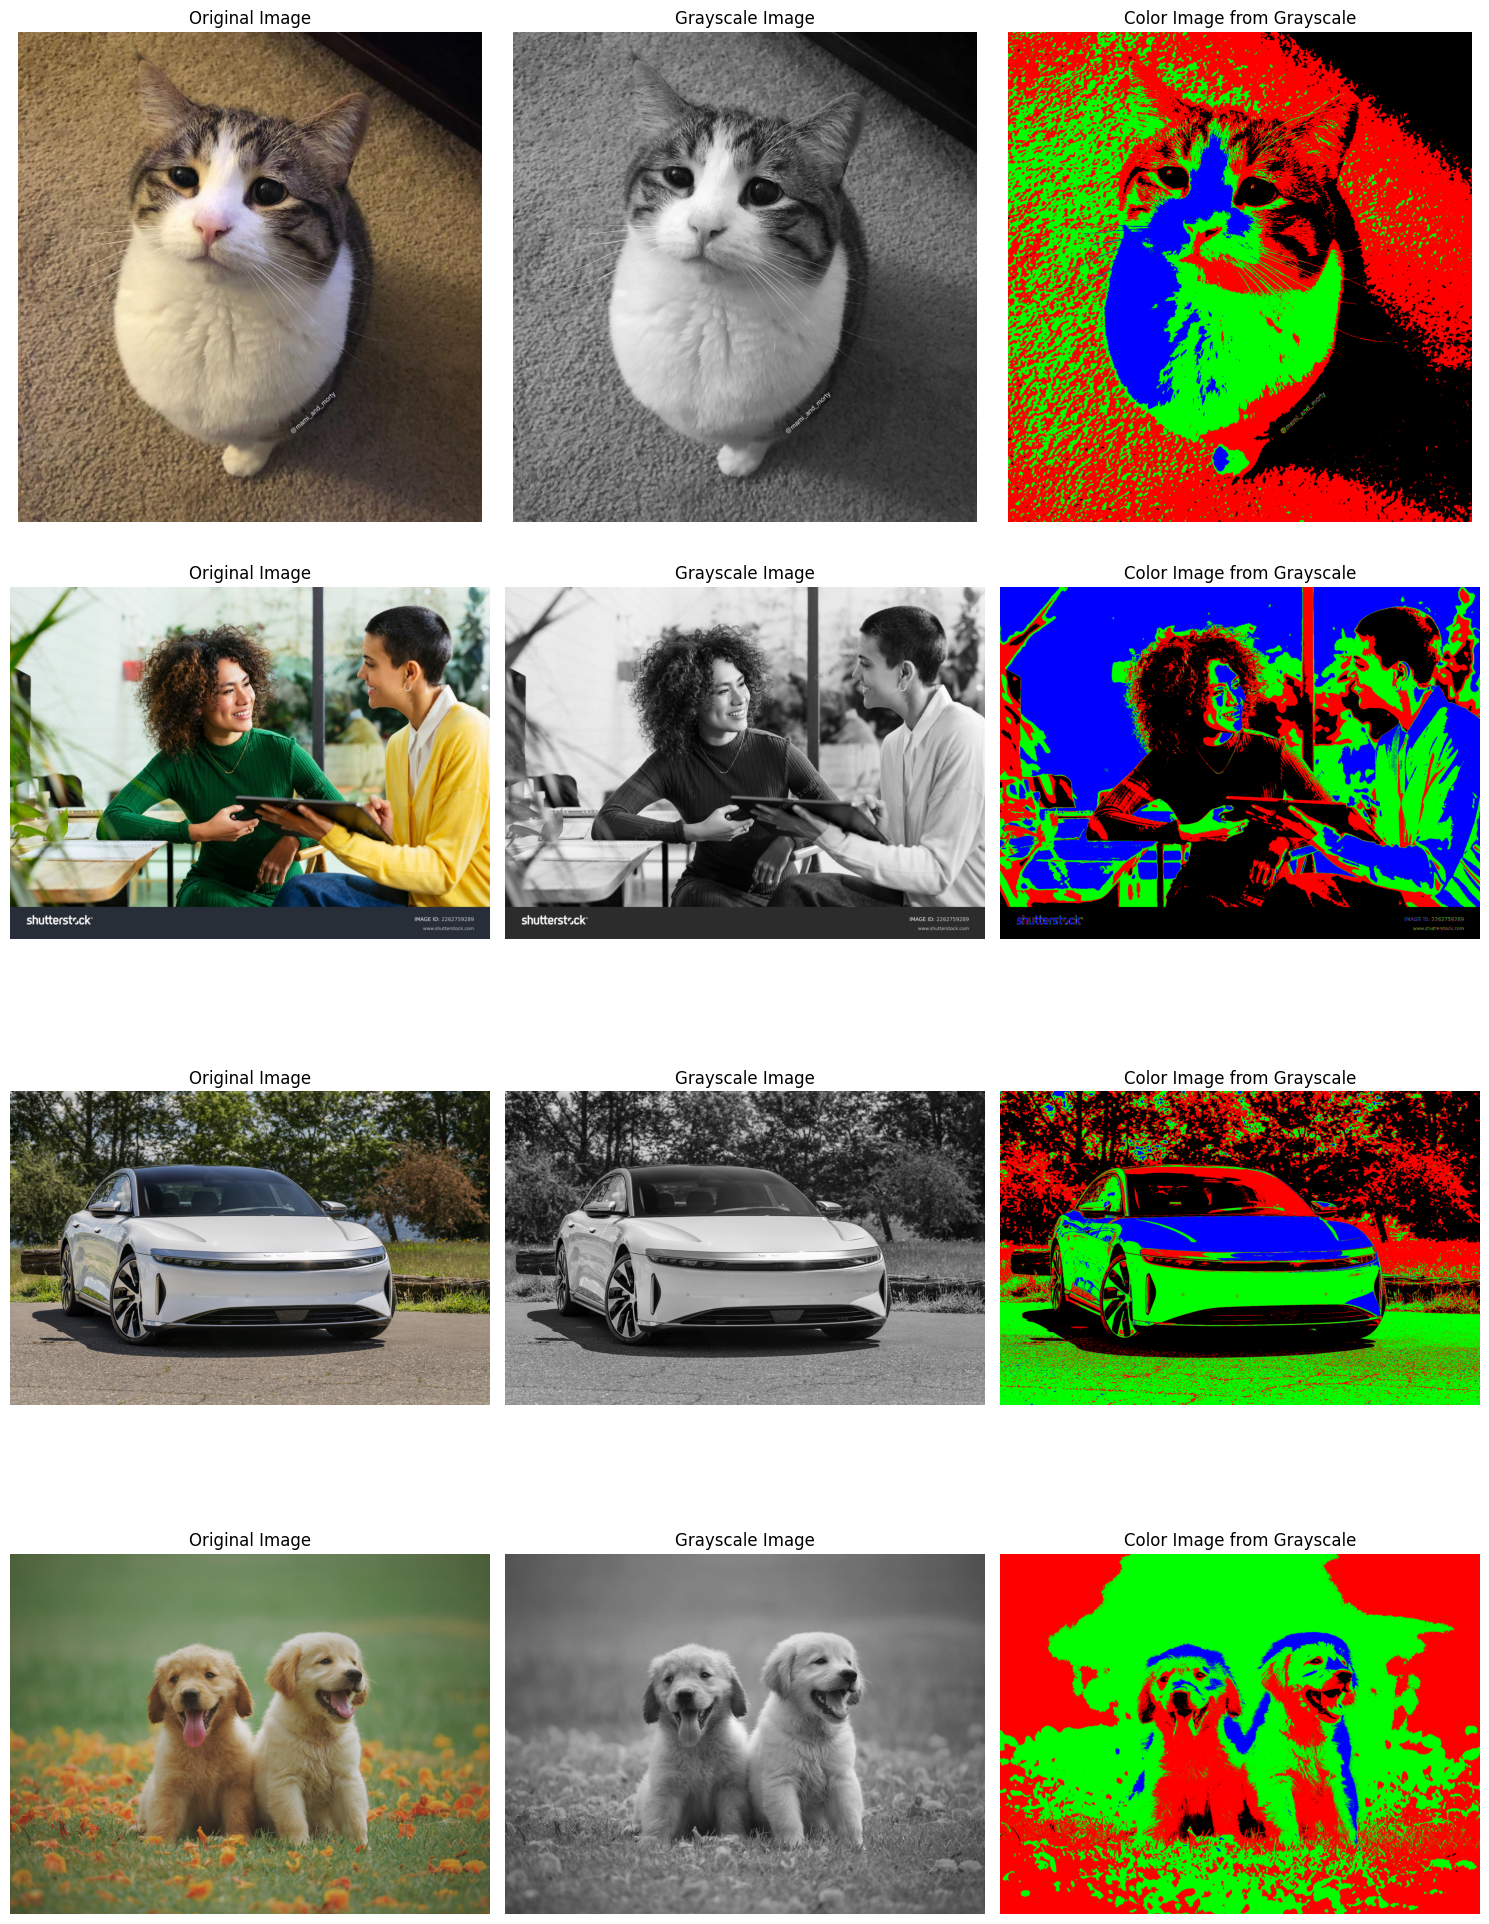

In [24]:
plot_multiple_images(image_color_array, image_gray_array, image_color_from_gray_array)